In [1]:
import torch

In [2]:
tensor1 = torch.Tensor([[1, 2, 3], [4, 5, 6]])
print(tensor1)

tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [3]:
tensor2 = torch.Tensor([[7, 8, 9], [10, 11, 12]])
print(tensor2)

tensor([[ 7.,  8.,  9.],
        [10., 11., 12.]])


In [5]:
tensor1.requires_grad, tensor2.requires_grad
# when requires_grad is True, it tracks computations for a tensor in the forward phase
# the gradient of the variable will be computed automatically in the backward phase

(False, False)

In [7]:
# Enable tracking of the gradients
tensor1.requires_grad_(True)
tensor2.requires_grad_(True)

tensor([[ 7.,  8.,  9.],
        [10., 11., 12.]], requires_grad=True)

In [8]:
tensor1.requires_grad, tensor2.requires_grad

(True, True)

In [9]:
# grad stores the gradient of the tensor
tensor1.grad, tensor2.grad

(None, None)

In [10]:
# Tensors and functions make up a directed acyclic computational graph
print(tensor1.grad_fn)

None


In [11]:
output_tensor = tensor1 * tensor2

In [12]:
output_tensor.requires_grad

True

In [13]:
output_tensor.grad

C:\Users\Safiuddin\anaconda3\lib\site-packages\torch\_tensor.py:1013: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten\src\ATen/core/TensorBody.h:417.)
  return self._grad


In [15]:
output_tensor.grad_fn
# Tensors have references to the function that created them. User-created tensors have no grad_fn

In [16]:
output_tensor = (tensor1 * tensor2).mean()
print(output_tensor.grad_fn)

In [17]:
output_tensor.backward() # Backward pass

In [18]:
print(tensor1.grad) # Gradients have been computed by the backward pass

tensor([[1.1667, 1.3333, 1.5000],
        [1.6667, 1.8333, 2.0000]])


In [19]:
print(tensor2.grad)

tensor([[0.1667, 0.3333, 0.5000],
        [0.6667, 0.8333, 1.0000]])


In [22]:
tensor3 = torch.Tensor([[1, 2, 3], [4, 5, 6]])
tensor3.requires_grad_(False) # Disable tracking of the gradients
output_tensor = (tensor1 * tensor3).mean()
output_tensor.backward()
print(tensor1.grad)
print(tensor3.grad) # tensor3 has no gradients because it was not tracked

tensor([[2.5000, 3.0000, 3.5000],
        [4.0000, 4.5000, 5.0000]])
None


In [23]:
new_tensor = tensor1 * 3
print(new_tensor.requires_grad)
print(new_tensor)

True
tensor([[ 3.,  6.,  9.],
        [12., 15., 18.]], grad_fn=<MulBackward0>)


In [26]:
# Stop autograd tracking inside a context manager
with torch.no_grad():
    new_tensor = tensor1 * 3
    print(f'Tensor 1 requires grad: {tensor1.requires_grad}')
    print(f'New tensor requires grad: {new_tensor.requires_grad}')
    print(f'New tensor: {new_tensor}')

Tensor 1 requires grad: True
New tensor requires grad: False
New tensor: tensor([[ 3.,  6.,  9.],
        [12., 15., 18.]])


In [27]:
def calculate(t):
    return t * 2

In [28]:
@torch.no_grad()
def calculate_no_grad(t):
    return t * 2

In [30]:
result_tensor = calculate(tensor1)
print(result_tensor)
print(result_tensor.requires_grad)

tensor([[ 2.,  4.,  6.],
        [ 8., 10., 12.]], grad_fn=<MulBackward0>)
True


In [31]:
result_tensor = calculate_no_grad(tensor1)
print(result_tensor)
print(result_tensor.requires_grad)

tensor([[ 2.,  4.,  6.],
        [ 8., 10., 12.]])
False


In [32]:
with torch.no_grad():
    new_tensor_no_grad = tensor1 * 3
    print(f'New tensor no grad: {new_tensor_no_grad}')

    with torch.enable_grad():
        new_tensor_grad = tensor1 * 3
        print(f'New tensor grad: {new_tensor_grad}')

New tensor no grad: tensor([[ 3.,  6.,  9.],
        [12., 15., 18.]])
New tensor grad: tensor([[ 3.,  6.,  9.],
        [12., 15., 18.]], grad_fn=<MulBackward0>)


In [36]:
tensor_one = torch.tensor([1.0, 2.0], requires_grad=True)
print(tensor_one)

tensor([1., 2.], requires_grad=True)


In [38]:
detached_tensor = tensor1.detach() # Detach the tensor from the graph. Will not be tracked
print(detached_tensor)
print(detached_tensor.requires_grad)

tensor([[1., 2., 3.],
        [4., 5., 6.]])
False


### Linear Model with AutoGrad

In [39]:
import numpy as np
import matplotlib.pyplot as plt

In [111]:
x_train = np.random.rand(20, 1)
y_train = 13 * x_train + 3 + np.random.randn(20, 1)
print(x_train.shape, y_train.shape)

(20, 1) (20, 1)


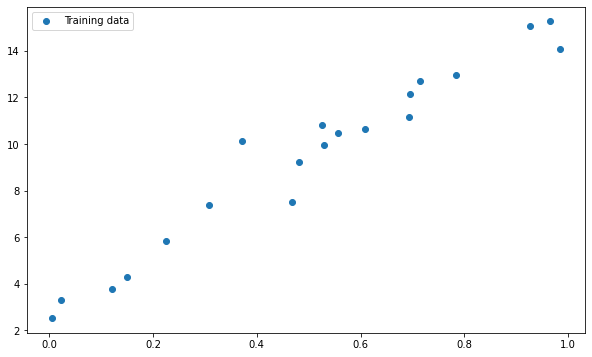

In [112]:
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, label='Training data')
plt.legend()
plt.show();

In [113]:
import torch

In [114]:
X_train = torch.from_numpy(x_train).float()
Y_train = torch.from_numpy(y_train).float()
print(f'Requires grad, X: {X_train.requires_grad}')
print(f'Requires grad, Y: {Y_train.requires_grad}')

Requires grad, X: False
Requires grad, Y: False


In [115]:
X_train.dtype, Y_train.dtype

(torch.float32, torch.float32)

In [116]:
INPUT_SIZE = 1
OUTPUT_SIZE = 1
HIDDEN_SIZE = 1

In [117]:
w1 = torch.rand(INPUT_SIZE, HIDDEN_SIZE, requires_grad=True)
w1.shape
w1.dtype

torch.float32

In [118]:
w2 = torch.rand(HIDDEN_SIZE, OUTPUT_SIZE, requires_grad=True)
w2.shape, w2.dtype

(torch.Size([1, 1]), torch.float32)

In [119]:
w1, w2

(tensor([[0.9254]], requires_grad=True),
 tensor([[0.9132]], requires_grad=True))

In [120]:
LEARNING_RATE = 1e-6

In [121]:
EPOCHS = 100
for iter in range(1, EPOCHS + 1):
    y_pred = X_train.mm(w1).mm(w2)
    loss = (y_pred - Y_train).pow(2).sum()

    # if iter % 50 == 0:
    print(iter, loss.item())
    
    loss.backward()

    with torch.no_grad():
        # Updating parameters shouldn't be tracked
        w1 -= LEARNING_RATE * w1.grad
        w2 -= LEARNING_RATE * w2.grad
        w1.grad.zero_() # Zero out the gradients
        w2.grad.zero_()

1 1885.7918701171875
2 1885.7073974609375
3 1885.62255859375
4 1885.5380859375
5 1885.453125
6 1885.368408203125
7 1885.28369140625
8 1885.1986083984375
9 1885.1136474609375
10 1885.029052734375
11 1884.9439697265625
12 1884.859130859375
13 1884.7740478515625
14 1884.6890869140625
15 1884.60400390625
16 1884.51904296875
17 1884.433349609375
18 1884.348388671875
19 1884.2633056640625
20 1884.177978515625
21 1884.0928955078125
22 1884.00732421875
23 1883.921875
24 1883.8369140625
25 1883.751220703125
26 1883.665771484375
27 1883.580322265625
28 1883.494873046875
29 1883.4091796875
30 1883.3236083984375
31 1883.2379150390625
32 1883.1522216796875
33 1883.06640625
34 1882.9808349609375
35 1882.895263671875
36 1882.8094482421875
37 1882.7236328125
38 1882.6376953125
39 1882.5517578125
40 1882.4659423828125
41 1882.3798828125
42 1882.2938232421875
43 1882.207763671875
44 1882.1217041015625
45 1882.03564453125
46 1881.9495849609375
47 1881.8631591796875
48 1881.77734375
49 1881.69091796875
50

In [122]:
print(f'w1: {w1} \n w2: {w2}')

w1: tensor([[0.9461]], requires_grad=True) 
 w2: tensor([[0.9341]], requires_grad=True)


In [123]:
x_train_tensor = torch.from_numpy(x_train).float()
y_pred = x_train_tensor.mm(w1).mm(w2).detach().numpy()
y_pred

array([[0.6931136 ],
       [0.6310339 ],
       [0.53771317],
       [0.19858654],
       [0.61297446],
       [0.42540336],
       [0.32792076],
       [0.46735406],
       [0.61374146],
       [0.27258545],
       [0.13258284],
       [0.10742082],
       [0.01983135],
       [0.00530968],
       [0.41406214],
       [0.8525246 ],
       [0.8187027 ],
       [0.4652001 ],
       [0.49238023],
       [0.8690078 ]], dtype=float32)

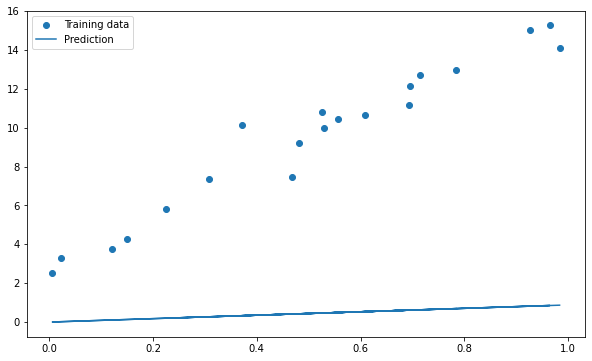

In [124]:
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, label='Training data')
plt.plot(x_train, y_pred, label='Prediction')
plt.legend()
plt.show();

50 1658.459228515625
100 434.8996887207031
150 68.0781021118164
200 59.69902420043945
250 59.622493743896484
300 59.62187576293945
350 59.62187194824219
400 59.62186813354492
450 59.62186813354492
500 59.62186813354492
550 59.62186813354492
600 59.62186813354492
650 59.62186813354492
700 59.62186813354492
750 59.62186813354492
800 59.62186813354492
850 59.62186813354492
900 59.62186813354492
950 59.62186813354492
1000 59.62186813354492


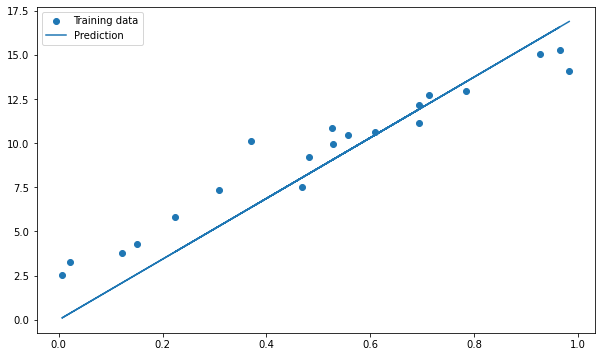

In [126]:
# Increase the number of epochs
w1 = torch.rand(INPUT_SIZE, HIDDEN_SIZE, requires_grad=True)
w2 = torch.rand(HIDDEN_SIZE, OUTPUT_SIZE, requires_grad=True)
LEARNING_RATE = 1e-4
EPOCHS = 1000
for iter in range(1, EPOCHS + 1):
    y_pred = X_train.mm(w1).mm(w2)
    loss = (y_pred - Y_train).pow(2).sum()

    if iter % 50 == 0:
        print(iter, loss.item())
    
    loss.backward()

    with torch.no_grad():
        # Updating parameters shouldn't be tracked
        w1 -= LEARNING_RATE * w1.grad
        w2 -= LEARNING_RATE * w2.grad
        w1.grad.zero_() # Zero out the gradients
        w2.grad.zero_()

x_train_tensor = torch.from_numpy(x_train).float()
y_pred = x_train_tensor.mm(w1).mm(w2).detach().numpy()

plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, label='Training data')
plt.plot(x_train, y_pred, label='Prediction')
plt.legend()
plt.show();